In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as nplin
import itertools
from sklearn.linear_model import LinearRegression

from matplotlib.ticker import MultipleLocator,FormatStrFormatter,AutoMinorLocator,ScalarFormatter

In [2]:
np.random.seed(0)

In [3]:
n_size = 4
n_method = 5

mse = np.zeros((n_size,n_method))

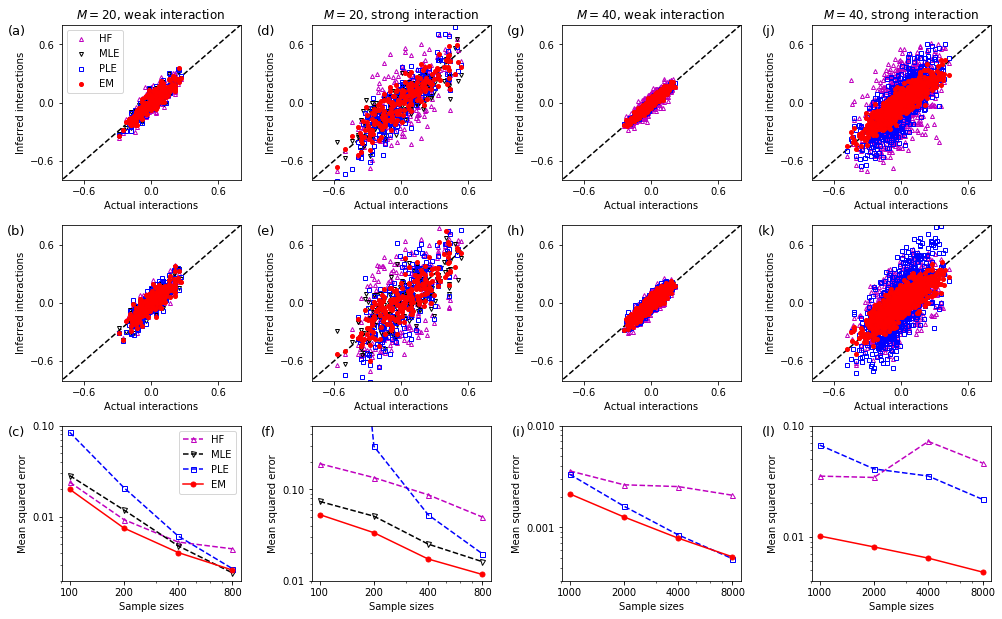

In [4]:
label = ['(a)','(d)','(g)','(j)','(b)','(e)','(h)','(k)','(c)','(f)','(i)','(l)']

nx,ny = 4,3
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.9))

# a) m = 20
for i,g in enumerate([0.5,1.0]):
    w = np.loadtxt('m20/w_20_%s_800.dat'%g)
    ax[0,i].plot([-1,1],[-1,1],'k--')
    ax[0,i].plot(w[0],w[1],'m^',marker='^',mfc='none',markersize=4,label='HF')
    ax[0,i].plot(w[0],w[2],'kv',marker='v',mfc='none',markersize=4,label='MLE')
    ax[0,i].plot(w[0],w[3],'bs',marker='s',mfc='none',markersize=4,label='PLE')
    #ax[0,0].plot(w[0],w[4],'go',marker='o',mfc='none',markersize=4,label='RE')
    ax[0,i].plot(w[0],w[5],'ro',marker='o',markersize=4,label='EM')

    w = np.loadtxt('m20/w_20_%s_400.dat'%g)
    ax[1,i].plot([-1,1],[-1,1],'k--')
    ax[1,i].plot(w[0],w[1],'m^',marker='^',mfc='none',markersize=4,label='HF')
    ax[1,i].plot(w[0],w[2],'kv',marker='v',mfc='none',markersize=4,label='MLE')
    ax[1,i].plot(w[0],w[3],'bs',marker='s',mfc='none',markersize=4,label='PLE')
    #ax[1,0].plot(w[0],w[4],'go',marker='o',mfc='none',markersize=4,label='RE')
    ax[1,i].plot(w[0],w[5],'ro',marker='o',markersize=4,label='EM')

    mse[0,:] = np.loadtxt('m20/mse_20_%s_100.dat'%g)
    mse[1,:] = np.loadtxt('m20/mse_20_%s_200.dat'%g)
    mse[2,:] = np.loadtxt('m20/mse_20_%s_400.dat'%g)
    #mse[3,:] = np.loadtxt('m20/mse_20_%s_600.dat'%g)
    mse[3,:] = np.loadtxt('m20/mse_20_%s_800.dat'%g)
    
    n_seq = [100,200,400,800]
    ax[2,i].loglog(n_seq,mse[:,0],'m^--',marker='^',mfc='none',markersize=5,label='HF')
    ax[2,i].loglog(n_seq,mse[:,1],'kv--',marker='v',mfc='none',markersize=5,label='MLE')
    ax[2,i].loglog(n_seq,mse[:,2],'bs--',marker='s',mfc='none',markersize=5,label='PLE')
    #ax[2,i].semilogy(n_seq,mse[:,3],'go--',marker='o',mfc='none',markersize=4,label='RE')
    ax[2,i].loglog(n_seq,mse[:,4],'ro-',marker='o',markersize=5,label='EM')

## m = 40
for j,g in enumerate([0.5,1.0]):
    i = j+2
    
    w = np.loadtxt('m40/w_40_%s_8000.dat'%g)
    ax[0,i].plot([-1,1],[-1,1],'k--')
    ax[0,i].plot(w[0],w[1],'m^',marker='^',mfc='none',markersize=4,label='HF')
    #ax[0,i].plot(w[0],w[2],'kv',marker='v',mfc='none',markersize=4,label='MLE')
    ax[0,i].plot(w[0],w[3],'bs',marker='s',mfc='none',markersize=4,label='PLE')
    #ax[0,0].plot(w[0],w[4],'go',marker='o',mfc='none',markersize=4,label='RE')
    ax[0,i].plot(w[0],w[5],'ro',marker='o',markersize=4,label='EM')

    w = np.loadtxt('m40/w_40_%s_2000.dat'%g)
    ax[1,i].plot([-1,1],[-1,1],'k--')
    ax[1,i].plot(w[0],w[1],'m^',marker='^',mfc='none',markersize=4,label='HF')
    #ax[1,i].plot(w[0],w[2],'kv',marker='v',mfc='none',markersize=4,label='MLE')
    ax[1,i].plot(w[0],w[3],'bs',marker='s',mfc='none',markersize=4,label='PLE')
    #ax[1,0].plot(w[0],w[4],'go',marker='o',mfc='none',markersize=4,label='RE')
    ax[1,i].plot(w[0],w[5],'ro',marker='o',markersize=4,label='EM')

    mse[0,:] = np.loadtxt('m40/mse_40_%s_1000.dat'%g)
    mse[1,:] = np.loadtxt('m40/mse_40_%s_2000.dat'%g)
    mse[2,:] = np.loadtxt('m40/mse_40_%s_4000.dat'%g)
    #mse[3,:] = np.loadtxt('m40/mse_40_%s_6000.dat'%g)
    mse[3,:] = np.loadtxt('m40/mse_40_%s_8000.dat'%g)
    
    n_seq = [1000,2000,4000,8000]
    
    ax[2,i].plot(n_seq,mse[:,0],'m^--',marker='^',mfc='none',markersize=5,label='HF')
    #ax[2,i].semilogy(n_seq,mse[:,1],'kv--',marker='v',mfc='none',markersize=4,label='MLE')
    ax[2,i].plot(n_seq,mse[:,2],'bs--',marker='s',mfc='none',markersize=5,label='PLE')
    #ax[2,i].semilogy(n_seq,mse[:,3],'go--',marker='o',mfc='none',markersize=4,label='RE')
    ax[2,i].plot(n_seq,mse[:,4],'ro-',marker='o',markersize=5,label='EM')
    ax[2,i].set_xscale('log')
    ax[2,i].set_yscale('log')
    
ax[2,1].set_ylim([0.01,1])
ax[0,0].legend()
ax[2,0].legend()

for j in range(ny-1):
    for i in range(nx):
        ax[j,i].set_xticks([-0.6,0,0.6])
        ax[j,i].set_yticks([-0.6,0,0.6])
        ax[j,i].set_xlim([-0.8,0.8])
        ax[j,i].set_ylim([-0.8,0.8])
        ax[j,i].set_xlabel('Actual interactions')
        ax[j,i].set_ylabel('Inferred interactions')

ax[0,0].set_title('$M=20$, weak interaction')
ax[0,1].set_title('$M=20$, strong interaction')
ax[0,2].set_title('$M=40$, weak interaction')
ax[0,3].set_title('$M=40$, strong interaction')

for i in range(nx):
    ax[2,i].set_xlabel('Sample sizes')
    ax[2,i].set_ylabel('Mean squared error')
   
    ax[2,i].xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax[2,i].xaxis.set_minor_formatter(FormatStrFormatter(''))

ax[2,0].set_xticks([100,200,400,800])
ax[2,1].set_xticks([100,200,400,800])
ax[2,2].set_xticks([1000,2000,4000,8000])
ax[2,3].set_xticks([1000,2000,4000,8000])

ax[2,0].set_ylim([0.002,0.1])
ax[2,1].set_ylim([0.01,0.5])
ax[2,2].set_ylim([0.0003,0.01])
ax[2,2].set_yticks([0.001,0.01])
ax[2,3].set_ylim([0.004,0.1])

ax[2,0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[2,1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[2,2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[2,3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

xlabel = np.full(nfig,-0.2)
ylabel = np.full(nfig,1.)
k = 0
for i in range(ny):
    for j in range(nx):        
        ax[i,j].text(xlabel[k],ylabel[k],label[k],transform=ax[i,j].transAxes,va='top',ha='right',fontsize=13)
        k += 1
        
plt.tight_layout(h_pad=1, w_pad=1.5)
plt.savefig('fig2.pdf', format='pdf', dpi=100)